In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

In [3]:
# 1. load mnist data
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target']

y = y.astype(np.int8)

In [4]:
# 2. data preprocessing
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# 3. split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=1/7, random_state=42)

In [6]:
# 4. train the model
# use rbf kernel
clf = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
clf.fit(X_train, y_train)

SVC()

In [7]:
# 5. model prediction
y_pred = clf.predict(X_test)

# 6. model evaluation
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Report: ")
print(classification_report(y_test, y_pred))

Accuracy:  0.9632
Report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       983
           1       0.98      0.99      0.98      1152
           2       0.95      0.96      0.95       967
           3       0.96      0.95      0.95      1034
           4       0.97      0.96      0.96       906
           5       0.97      0.96      0.96       937
           6       0.97      0.98      0.97       961
           7       0.93      0.97      0.95      1055
           8       0.97      0.95      0.96       969
           9       0.97      0.94      0.95      1036

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



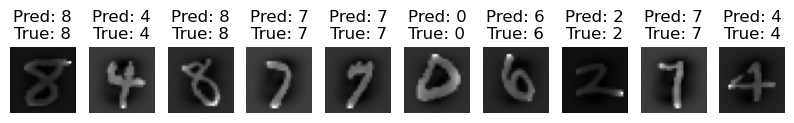

In [81]:
# plot
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize=(10, 3))

for i in range(num_images):
    ax = axes[i]
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {y_pred[i]}\nTrue: {y_test.iloc[i]}")
    ax.axis('off')

plt.show()

**Advantages of using SVM for digit classification:**

1. Effective in High Dimensions:

- Image data often have a large number of features (pixels). SVMs perform well in high-dimensional spaces, making them suitable for image classification.

2. Robustness to Overfitting:

- SVMs aim to find the optimal hyperplane that maximizes the margin between classes, which helps in avoiding overfitting, especially with proper regularization.

3. Use of Kernel Functions:

- SVMs can handle non-linear relationships using kernel tricks (e.g., radial basis function kernel), allowing them to model complex patterns in data.